# LPA Simulation Laboratory

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# this makes sure the images don't come out looking muddy on 
# retina displays (which your computer probably uses)
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
def sim(b, mu_l, mu_a, cel, cea, cpa, X0, T):
    
    X = np.zeros((3,T+1), dtype=float)

    X[:,0] = X0
    
    for n in range(1,T+1):
        
        L = X[0,n-1]
        
        P = X[1,n-1]
        
        A = X[2,n-1]
        
        X[0,n] = b*A*np.exp(-cel*L-cea*A)
        
        X[1,n] = (1.-mu_l)*L
        
        X[2,n] = P*np.exp(-cpa*A) + (1.-mu_a)*A
        
    return X

In [178]:
# Table 3.2 in the book of Cushing et al, p.86
mu_l = 0.1613
cel = 0.01385
cea = 0.01114
b = 7.876
mu_a = 0.95 #0.00421
cpa = 0.5

T = 80

X0 = np.array([250,5,100])

In [179]:
X = sim(b, mu_l, mu_a, cel, cea, cpa, X0, T)
L = X[0,:]
P = X[1,:]
A = X[2,:]

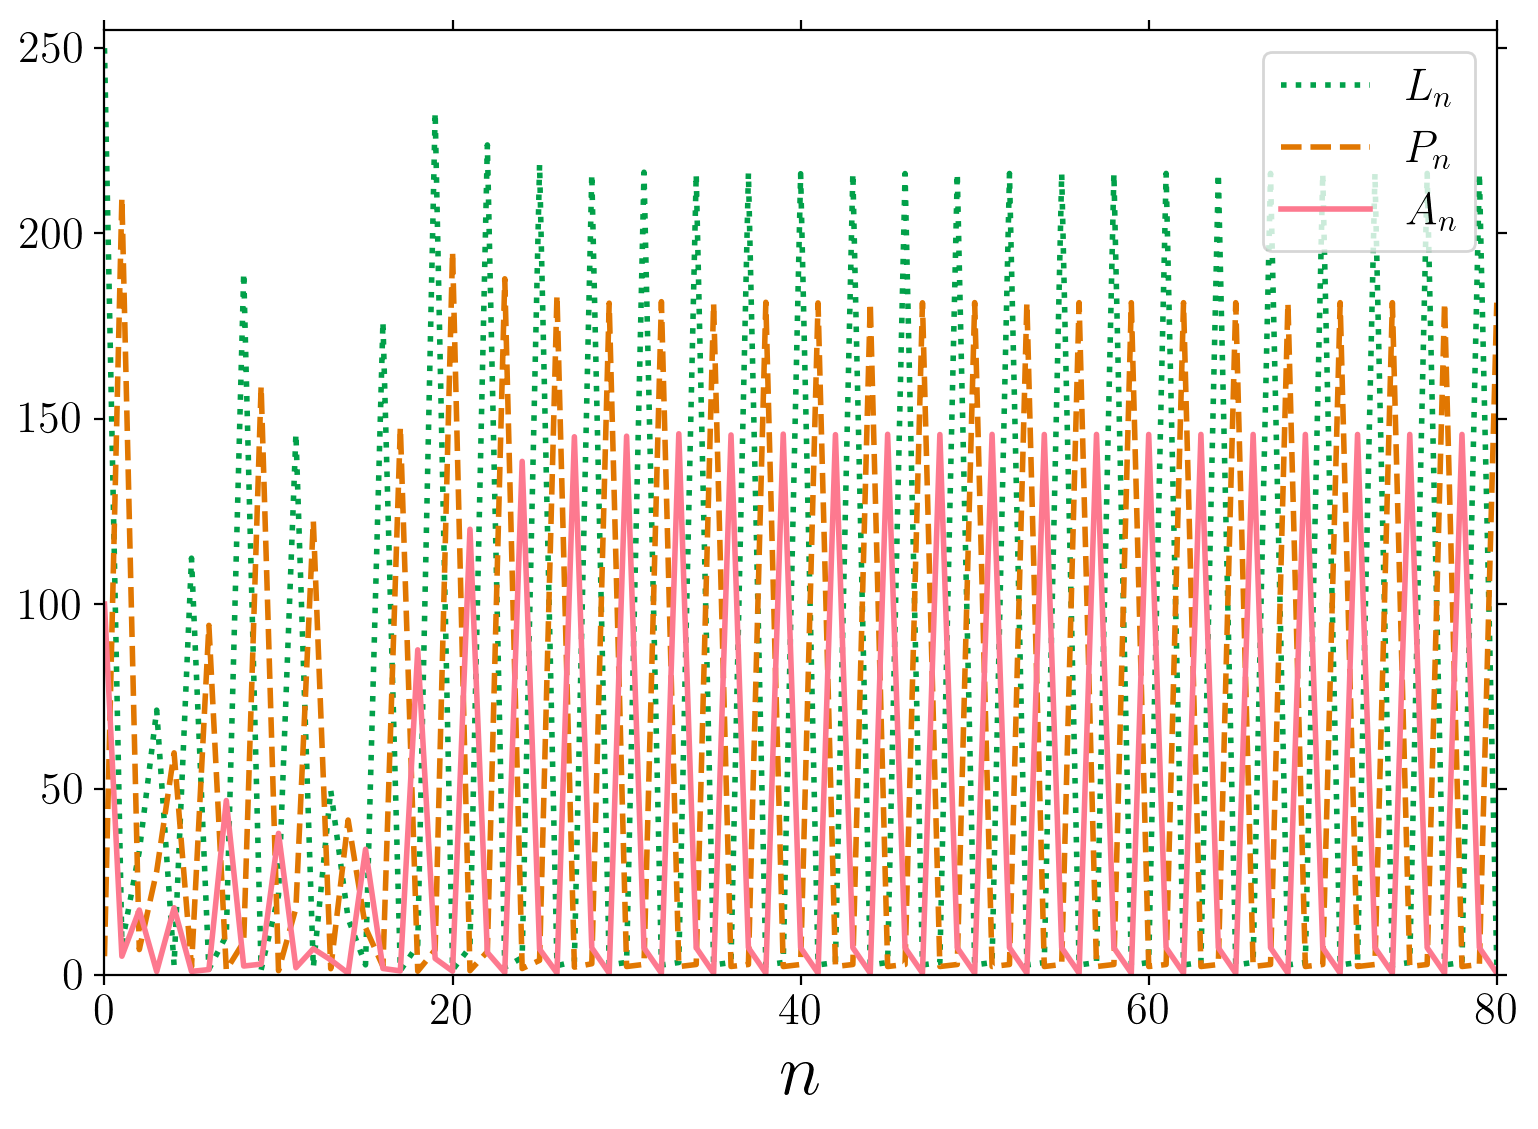

In [180]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig, ax =plt.subplots()   
    
tt = np.arange(0,T+1)
plt.plot(tt, L, color='xkcd:emerald', linestyle='dotted', label=r'$L_{n}$', linewidth=2)
plt.plot(tt, P, color='xkcd:pumpkin', linestyle='dashed', label=r'$P_{n}$', linewidth=2)
plt.plot(tt, A, color='xkcd:carnation', label=r'$A_{n}$', linewidth=2)

plt.xlabel(r"$n$", fontsize=26, color = 'k')

plt.tick_params(axis='x', which='both', top='off', color = 'k')
plt.xticks(fontsize=16, rotation=0, color = 'k')
plt.tick_params(axis='y', which='both', right='off', color = 'k')
plt.yticks(fontsize=16, rotation=0, color = 'k')
ax.locator_params(axis='y', nbins=6)
ax.locator_params(axis='x', nbins=4)

ax.legend(fontsize=16, loc='upper right')

plt.xlim([0, T])
plt.ylim([-0.1, 1.02*max(np.amax(L), np.amax(A))])

plt.tight_layout()

fig.set_size_inches(8, 6)  
        
figname = 'lpa_time_series_cpa=%.5f' % (cpa) + '.png'
plt.savefig(figname, dpi=600)

plt.show()

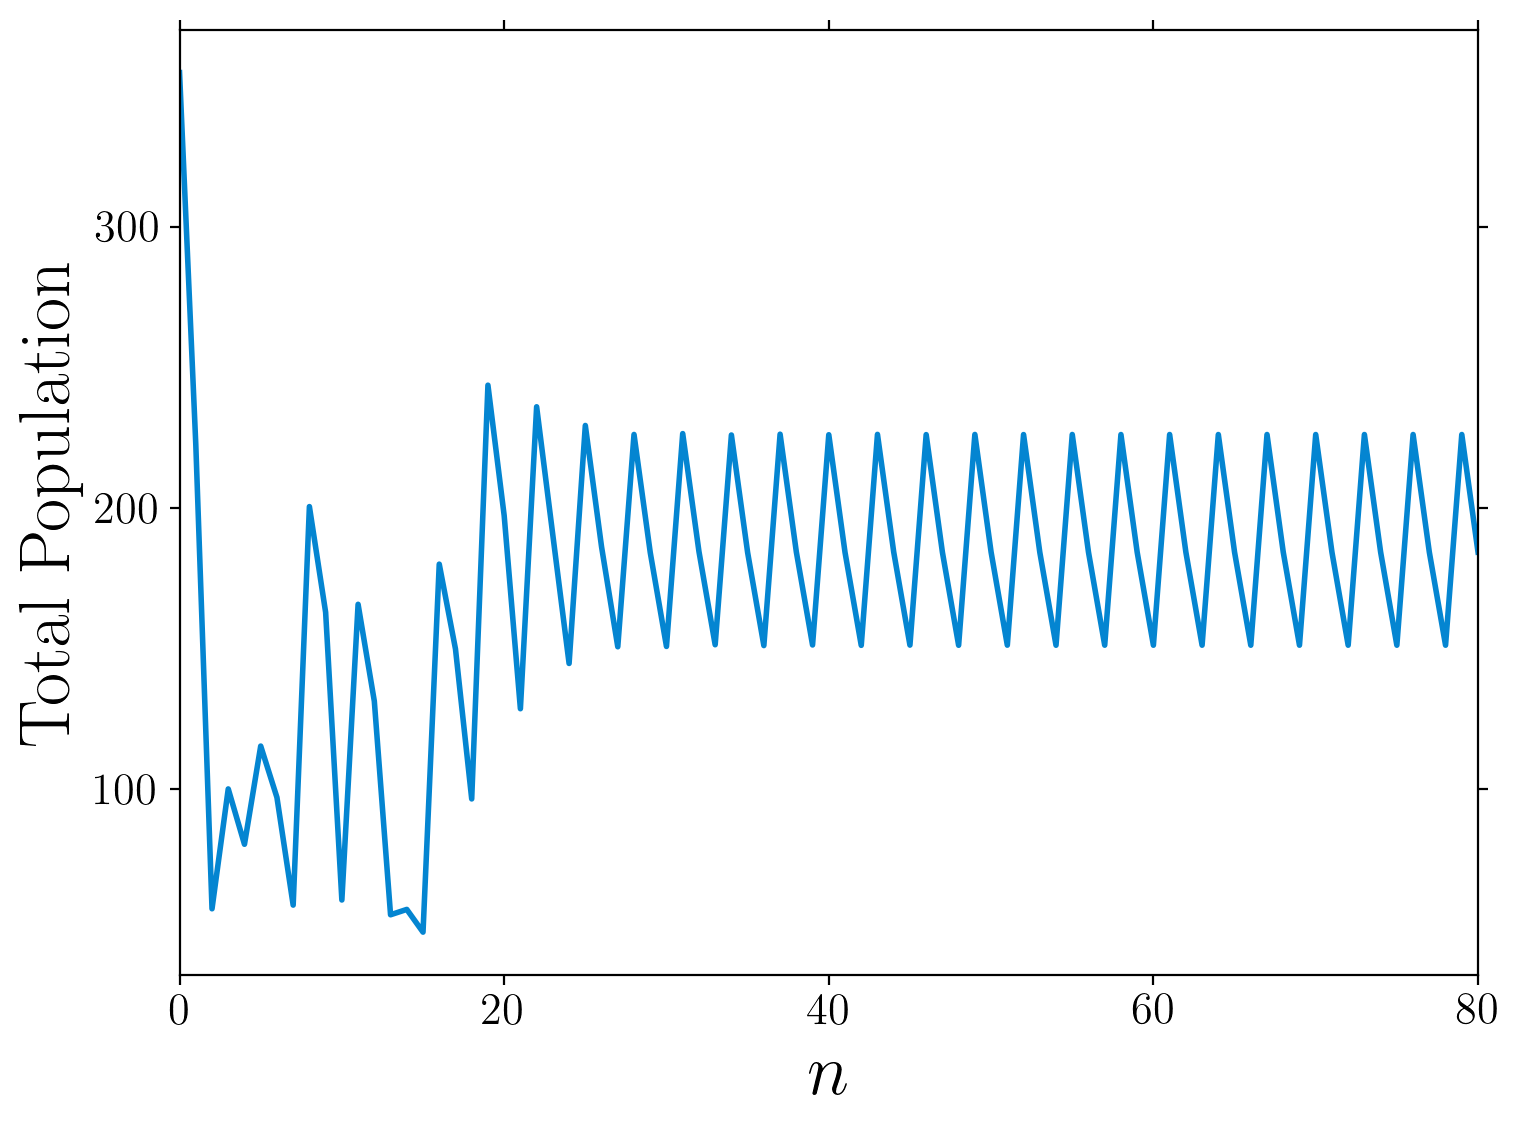

In [181]:
fig, ax =plt.subplots()   
    
plt.plot(tt, L+P+A, color='xkcd:cerulean', linestyle='solid',linewidth=2)

plt.xlabel(r"$n$", fontsize=26, color = 'k')
plt.ylabel(r"Total Population", fontsize=26, color = 'k')

plt.tick_params(axis='x', which='both', top='off', color = 'k')
plt.xticks(fontsize=16, rotation=0, color = 'k')
plt.tick_params(axis='y', which='both', right='off', color = 'k')
plt.yticks(fontsize=16, rotation=0, color = 'k')
ax.locator_params(axis='y', nbins=6)
ax.locator_params(axis='x', nbins=4)

plt.xlim([0, T])
#plt.ylim([-0.1, 1.02*np.amax(L+P+A)])

plt.tight_layout()

fig.set_size_inches(8, 6)  
        
figname = 'lpa_time_series_total_pop_cpa=%.5f' % (cpa) + '.png'
plt.savefig(figname, dpi=600)

plt.show()

Now, we create the bifurcation diagram as in Cushing et al. p. 104. 

In [201]:
cmin=0. # smallest parameter value to look at 
cmax=0.6 # largest parameter value to look at 
num_c_samples= int(5e4) # number of parameter values we want to try
N=int(2e3) # number of time steps we perform in each sample
tail_size= 100 # size of the "tail" of the simulation we look at to identify the attractor
    
# create array of params to try
cc = np.linspace(cmin, cmax, num = num_c_samples, endpoint=True)

# pre-allocate storage for the tails (~ our attractors) 
tails = np.zeros([tail_size, num_c_samples])

mu_l = 0.1613
cel = 0.01385
cea = 0.01114
b = 7.876
mu_a = 0.96
    
for m in range(0, num_c_samples): 
    
    cpa = cc[m] # pick param
    
    X0 = np.array([250,5,100])    
    
    X = sim(b, mu_l, mu_a, cel, cea, cpa, X0, N)
    L = X[0,:]
    P = X[1,:]
    A = X[2,:]
    
    x = L+P+A
    
    tail = x[-tail_size:] # estimate attractor from the tail
    
    tails[:, m] = tail # store attractor guess for that param value

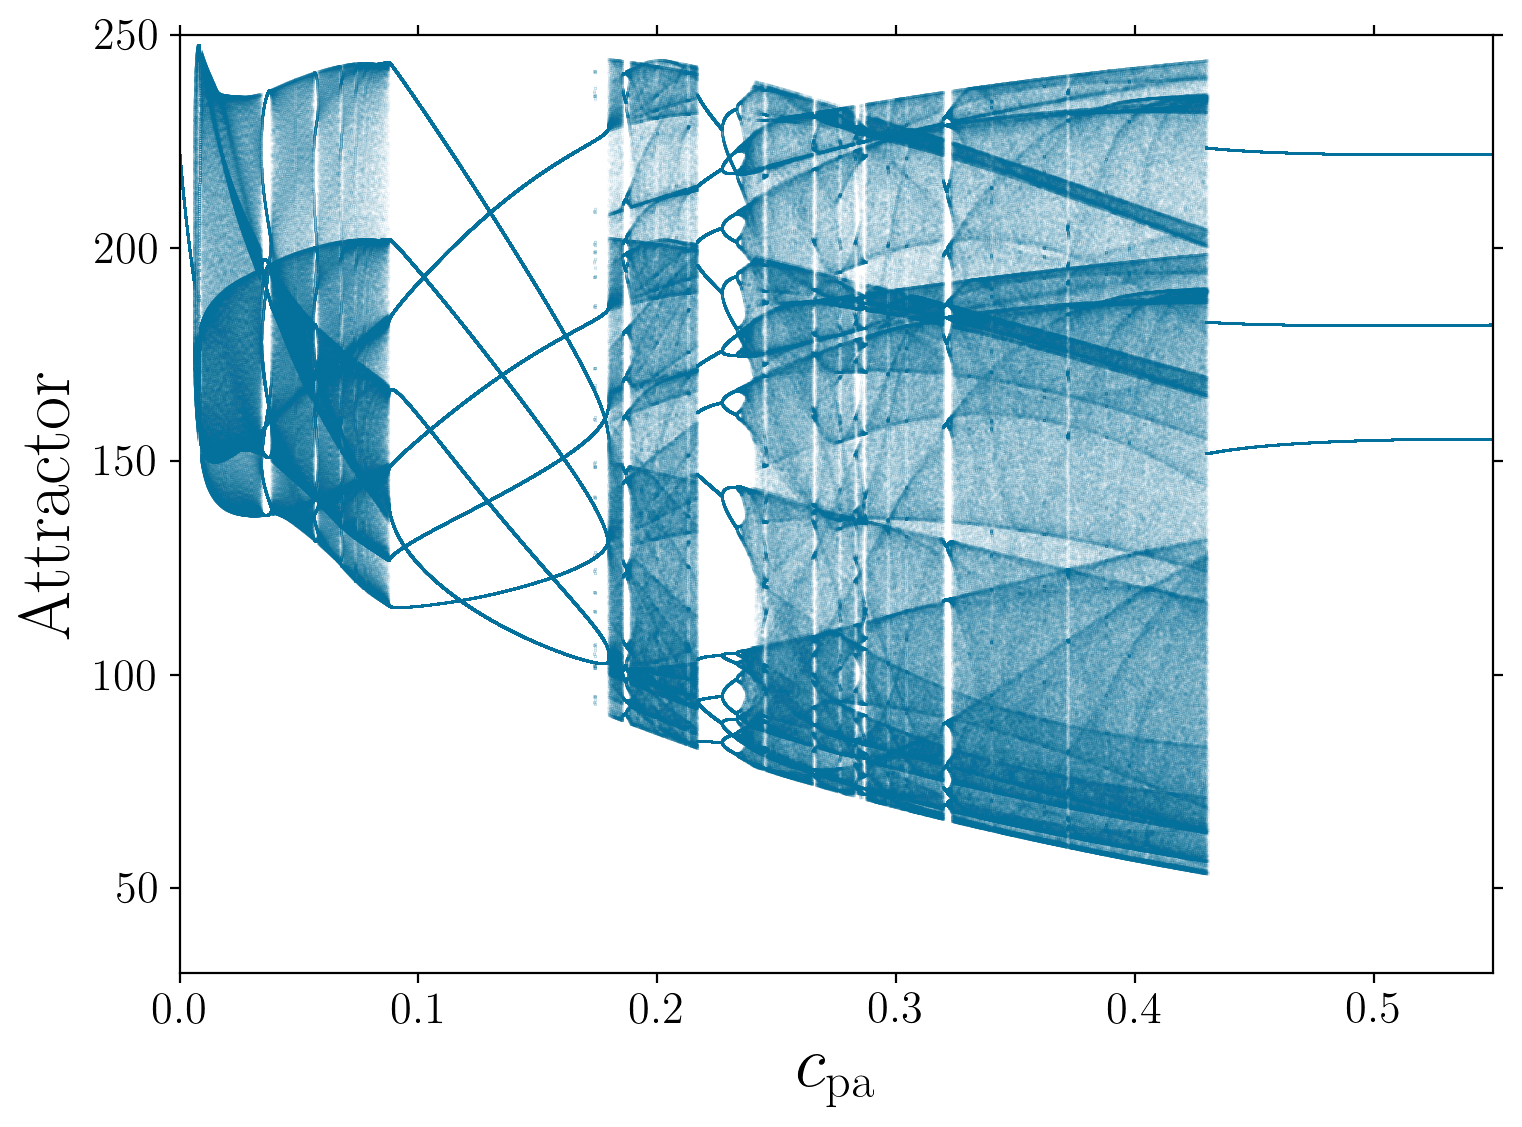

In [204]:
fig, ax =plt.subplots() 

plt.scatter(np.ravel(np.tile(cc,tail_size)),np.ravel(tails), s=1e-4, color='xkcd:ocean blue')
plt.xlabel(r"$c_{\mathrm{pa}}$", fontsize=26, color = 'k')
plt.ylabel(r"Attractor", fontsize=26, color='k')

plt.tick_params(axis='x', which='both', top='off', color = 'k')
plt.xticks(fontsize=16, rotation=0, color = 'k')
plt.tick_params(axis='y', which='both', right='off', color = 'k')
plt.yticks(fontsize=16, rotation=0, color = 'k')
ax.locator_params(axis='y', nbins=8)
ax.locator_params(axis='x', nbins=8)

plt.xlim([0., 0.55])
plt.ylim([30, 250])

plt.frameon = True 

plt.tight_layout()

fig.set_size_inches(8, 6)  
        
#figname = 'lpa_bifurcation_diagram.png'
#plt.savefig(figname, dpi=700)

plt.show()